# OpenCV Programs Set 1

### Getting started

variable type: <type 'numpy.ndarray'>
Number of rows: 739
Number of columns: 600
Number of channels: 3
Thus image size is 739x600x3
Image pixel's dataType is uint8


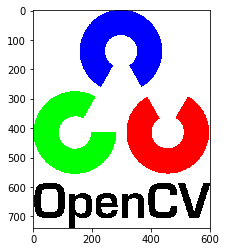

In [1]:
%config IPCompleter.greedy=True #Allows autocompletion by tab button

import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline 

#To read and display an image
img = cv2.imread("inputs/opencv-logo.png")
plt.imshow(img)

#To write an image to file
cv2.imwrite("outputs/output1.jpg",img)

#variable type
print("variable type: "+ str(type(img)))

print("Number of rows: "+ str(len(img)))
print("Number of columns: "+str( len(img[0]) ))
print("Number of channels: "+str(len(img[0][0])))

#Getting the shapes Directly
r,b,c=img.shape

print ("Thus image size is "+`r`+"x"+`b`+"x"+`c`)
print("Image pixel's dataType is "+ str(img.dtype))

#### ImageTypes and color channels

image size is 356x493x3


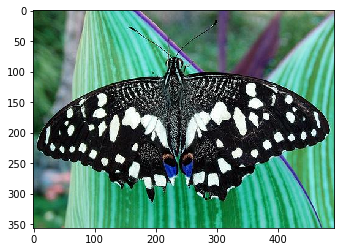

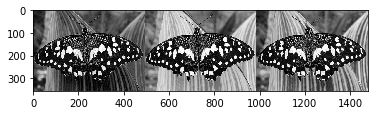

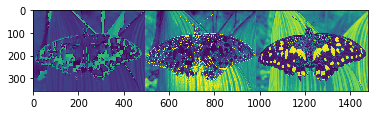

In [6]:
# Display the image as it is

plt.figure()
color = cv2.imread("inputs/butterfly.jpg")
plt.imshow(color)
height,width,channels = color.shape
print("image size is "+`height`+"x"+`width`+"x"+`channels`)

#Seperate the RGB Planes
b,g,r = cv2.split(color)

#Create empty ndarray to keep 3 image colour channels stacked side by side
rgb_split = np.empty([height,width*3,3],'uint8')

rgb_split[:, 0:width] = cv2.merge([b,b,b])
rgb_split[:, width:width*2] = cv2.merge([g,g,g])
rgb_split[:, width*2:width*3] = cv2.merge([r,r,r])
plt.figure()
plt.imshow(rgb_split)

#Change the colour space
hsv = cv2.cvtColor(color, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)
hsv_split = np.concatenate((h,s,v),axis=1)
plt.figure()
plt.imshow(hsv_split)

In [7]:
#Taking the Previous Butterfly image and converting to grayscale

gray = cv2.cvtColor(color, cv2.COLOR_RGB2GRAY)
#Writing to file
if cv2.imwrite("outputs/gray.jpg",gray):
    print("writing to file gray.jpg is successful")

b = color[:,:,0] #blue channel
g = color[:,:,1] #green channel
r = color[:,:,2] #red channel

#4th channel is for transpiracy (i.e. aplha channel)
# high \alpha implies high transparency
rgba = cv2.merge((b,g,r,g))
if cv2.imwrite("outputs/rgba.png",rgba):
    print("writing to file rgba.png is successful")

writing to file gray.jpg is successful
writing to file rgba.png is successful


#### Gaussian Blur, Dilation, Erosion

Text(0.5,1,'Erode')

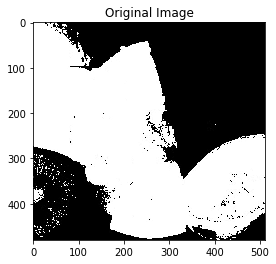

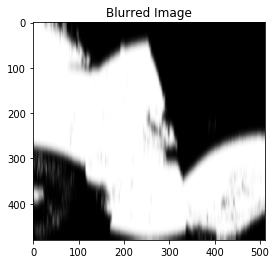

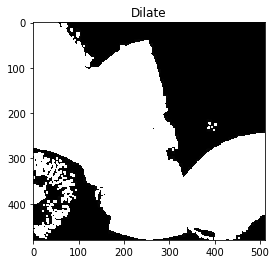

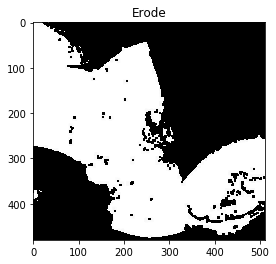

In [4]:
image = cv2.imread("inputs/thresh.jpg")
plt.figure()
plt.imshow(image)
plt.title("Original Image")

blur = cv2.GaussianBlur(image, (5,55),0)
plt.figure()
plt.imshow(blur)
plt.title("Blurred Image")

kernel = np.ones((5,5),'uint8')

dilate = cv2.dilate(image,kernel,iterations=1)
plt.figure()
plt.imshow(dilate)
plt.title("Dilate")

erode = cv2.erode(image,kernel,iterations=1)
plt.figure()
plt.imshow(erode)
plt.title("Erode")


#### Scaling and Rotating an image

Text(0.5,1,'Rotated')

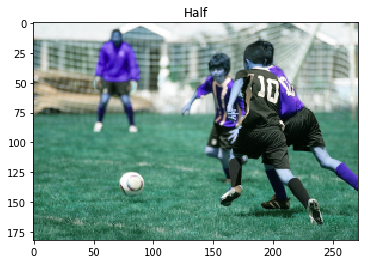

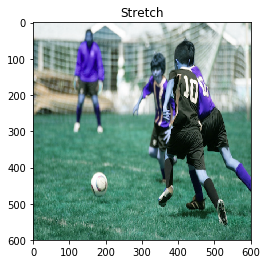

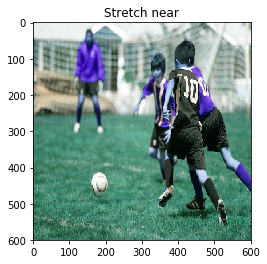

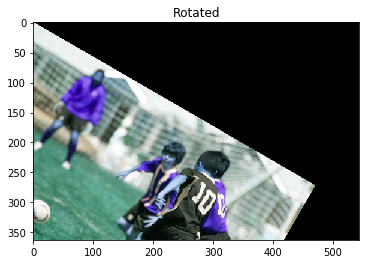

In [22]:
img = cv2.imread("inputs/players.jpg",cv2.IMREAD_COLOR)

# Scale
img_half = cv2.resize(img, (0,0), fx=0.5, fy=0.5)
img_stretch = cv2.resize(img, (600,600))
img_stretch_near = cv2.resize(img, (600,600), interpolation=cv2.INTER_NEAREST)

plt.figure()
plt.imshow(img_half)
plt.title("Half")

plt.figure()
plt.imshow(img_stretch)
plt.title("Stretch")

plt.figure()
plt.imshow(img_stretch_near)
plt.title("Stretch near")


# Rotation
M = cv2.getRotationMatrix2D((0,0), -30, 1)
rotated = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
plt.figure()
plt.imshow(rotated)
plt.title("Rotated")


#### Video Capture in openCV

The below programs are written to file and run from ipython as it is required to use the cv2.NamedWindow and cv2.imshow functions which dont display inline jupyter notebooks

In [2]:
%%writefile VideoCapture.py
import numpy as np
import cv2
cap = cv2.VideoCapture(0)

while(True):
    ret, frame = cap.read()

    frame = cv2.resize(frame, (0,0), fx=0.5,fy=0.5)
    cv2.imshow("Frame",frame)

    ch = cv2.waitKey(1)
    if ch & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Overwriting VideoCapture.py


In [3]:
%run VideoCapture.py

In [1]:
%%writefile VideoCaptureAndaddClickable.py

import numpy as np
import cv2

cap = cv2.VideoCapture(0)

color = (0,255,0)
line_width = 3
radius = 100
point = (0,0)

def click(event, x, y, flags, param):
    global point, pressed
    if event == cv2.EVENT_LBUTTONDOWN:
        print("Pressed",x,y)
        point = (x,y)

cv2.namedWindow("Frame")
cv2.setMouseCallback("Frame",click)

while(True):
    ret, frame = cap.read()

    frame = cv2.resize(frame, (0,0), fx=0.5,fy=0.5)
    cv2.circle(frame, point, radius, color, line_width)
    cv2.imshow("Frame",frame)

    ch = cv2.waitKey(1)
    if ch & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Writing VideoCaptureAndaddClickable.py


In [2]:
%run VideoCaptureAndaddClickable.py

('Pressed', 189, 95)


In [9]:
%%writefile drawableApp.py


import numpy as np
import cv2

# Global variables
canvas = np.ones([500,500,3],'uint8')*255
radius = 3
color = (0,255,0)
pressed = False

# click callback
def click(event, x, y, flags, param):
	global canvas, pressed
	if event == cv2.EVENT_LBUTTONDOWN:
		pressed = True
		cv2.circle(canvas,(x,y),radius,color,-1)
	elif event == cv2.EVENT_MOUSEMOVE and pressed == True:
		cv2.circle(canvas,(x,y),radius,color,-1)
	elif event == cv2.EVENT_LBUTTONUP:
		pressed = False

# window initialization and callback assignment
cv2.namedWindow("canvas")
cv2.setMouseCallback("canvas", click)

# Forever draw loop
while True:

	cv2.imshow("canvas",canvas)

	# key capture every 1ms
	ch = cv2.waitKey(1)
	if ch & 0xFF == ord('q'):
		break
	elif ch & 0xFF == ord('b'):
		color = (255,0,0)
	elif ch & 0xFF == ord('g'):
		color = (0,255,0)
	

cv2.destroyAllWindows()

Writing drawableApp.py


In [10]:
%run drawableApp.py

<Figure size 432x288 with 0 Axes>